## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0717 17:32:56.074095 4685309376 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 17:32:56.075098 4685309376 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 17:32:56.086198 4685309376 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 17:32:56.086907 4685309376 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.p

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1780 - acc: 0.2659 - val_loss: 2.0132 - val_acc: 0.3394
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9533 - acc: 0.3618 - val_loss: 1.8986 - val_acc: 0.3821
Epoch 3/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8623 - acc: 0.3949 - val_loss: 1.8212 - val_acc: 0.4084
Epoch 4/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8002 - acc: 0.4189 - val_loss: 1.7818 - val_acc: 0.4235
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7521 - acc: 0.4356 - val_loss: 1.7429 - val_acc: 0.4376
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7122 - acc: 0.4492 - val_loss: 1.7010 - val_acc: 0.4500
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6791 - acc: 0.4608 - val_loss: 1.6793 - val_acc

50000/50000 [==============================] - 3s 62us/step - loss: 1.7921 - acc: 0.3702 - val_loss: 1.7430 - val_acc: 0.3922
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7096 - acc: 0.4018 - val_loss: 1.6932 - val_acc: 0.3997
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6531 - acc: 0.4215 - val_loss: 1.6387 - val_acc: 0.4282
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6085 - acc: 0.4368 - val_loss: 1.6012 - val_acc: 0.4397
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5716 - acc: 0.4479 - val_loss: 1.5793 - val_acc: 0.4447
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5406 - acc: 0.4592 - val_loss: 1.5476 - val_acc: 0.4559
Epoch 8/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5107 - acc: 0.4715 - val_loss: 1.5170 - val_acc: 0.4639
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 63us/step - loss: 1.7370 - acc: 0.3886 - val_loss: 1.7043 - val_acc: 0.3962
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6785 - acc: 0.4097 - val_loss: 1.6564 - val_acc: 0.4192
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6309 - acc: 0.4264 - val_loss: 1.6143 - val_acc: 0.4327
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5920 - acc: 0.4417 - val_loss: 1.6048 - val_acc: 0.4354
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5597 - acc: 0.4534 - val_loss: 1.5624 - val_acc: 0.4469
Epoch 8/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5276 - acc: 0.4641 - val_loss: 1.5324 - val_acc: 0.4586
Epoch 9/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5009 - acc: 0.4736 - val_loss: 1.5240 - val_acc: 0.4579
Epoch 10/50
50000/50000 [===========================

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

'Code Here\n將結果繪出\n'

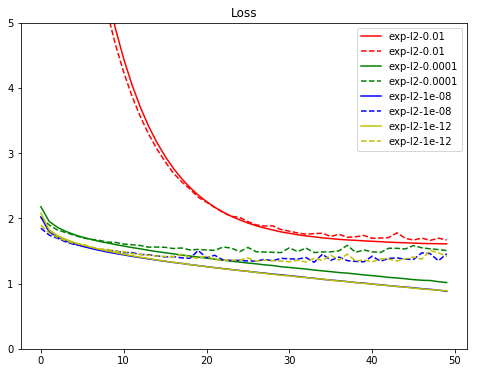

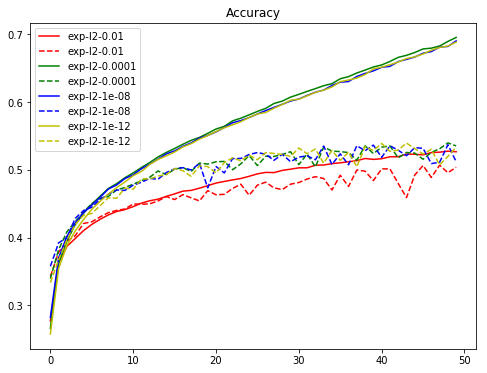

In [9]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()